### 10 Neural nets - keras CIFAR 10 classification 

In [72]:
pip install tensorflow

In [2]:
!pip install tensorboardcolab

**Import statements**

In [3]:
from numpy.random import seed
seed(888) #random number
import tensorflow as tf
tf.random.set_seed(404)
import os
import numpy as np
from tensorflow import keras
from keras.datasets import cifar10
## for visualizing data
from IPython.display import display
from keras.preprocessing.image import array_to_img
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
#certain constant values which are hard-coded
LABEL_NAMES = ['Plane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
NR_CLASSES = 10
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS
VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

**Import the dataset**

In [5]:
type(cifar10)

module

In [6]:
#retrieves the  test and train dataset
(x_train_all, y_train_all) , (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 4s 0us/step


**Explore data and analyse features**

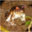

In [7]:
#visualize data in the form of array to image
pic = array_to_img(x_train_all[0])
display(pic)

In [8]:
LABEL_NAMES[y_train_all[7][0]]

'Horse'

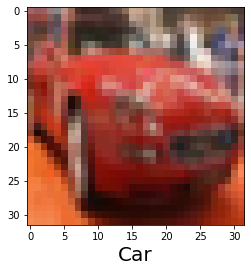

In [9]:
plt.imshow(x_train_all[5])
plt.xlabel(LABEL_NAMES[y_train_all[5][0]], fontsize=20)
plt.show()

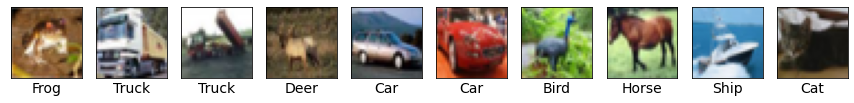

In [10]:
#displaying multiple images in a row
plt.figure(figsize=(15,5))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.yticks([])
  plt.xticks([])
  plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=14)
  plt.imshow(x_train_all[i])


In [11]:
x_train_all[0].shape

(32, 32, 3)

In [12]:
nr_images, x, y, c = x_train_all.shape
print(f'images = {nr_images} \t width={x} \t height={y} \t channels = {c}')

images = 50000 	 width=32 	 height=32 	 channels = 3


In [13]:
x_test.shape

(10000, 32, 32, 3)

**pre-processing data**

In [14]:
type(x_train_all[0][0][0][0])

numpy.uint8

In [15]:
#change unsigned int to float
x_train_all, x_test = x_train_all/255.0 , x_test/255.0

In [16]:
type(x_train_all[0][0][0][0])

numpy.float64

In [17]:
## flatten the dataset into a single vector
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)
x_train_all.shape


(50000, 3072)

In [18]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)
print(f'shape of x_test {x_test.shape}')

shape of x_test (10000, 3072)


**create a validation dataset (for tuning the model)**


In [19]:
#from training data (ie) 50,000 => take 10,000 for validation 
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [20]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]

**Creating a sample model for visualization**

In [21]:
x_train_xs = x_train[:SMALL_TRAIN_SIZE]
y_train_xs = y_train[:SMALL_TRAIN_SIZE]

**Neural Network architecture**

In [22]:
#define the model
#compile it
#fit the model accordingly
from keras.models import Sequential
from keras.layers import Dense, Activation

model_1 = Sequential([
                      Dense(units= 128, input_dim=TOTAL_INPUTS, activation='relu', name='hidden1'),#first hidden layer - total inputs (32*32*3)
                      Dense(units= 64, activation='relu', name='hidden2'),#second hidden layer
                      Dense(16, activation='relu', name='hidden3'),
                      Dense(10, activation='softmax', name='output') #10 classes of image output layer
])

# compiling the  model
model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [23]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden1 (Dense)              (None, 128)               393344    
_________________________________________________________________
hidden2 (Dense)              (None, 64)                8256      
_________________________________________________________________
hidden3 (Dense)              (None, 16)                1040      
_________________________________________________________________
output (Dense)               (None, 10)                170       
Total params: 402,810
Trainable params: 402,810
Non-trainable params: 0
_________________________________________________________________


In [42]:
#create another model and compare with first model
#with dropout to prevent overfitting
from keras.layers import Dropout
model_2 = Sequential()
model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_2.add(Dense(128, activation='relu', name='hidden1'))
model_2.add(Dense(64, activation='relu', name='hidden2'))
model_2.add(Dense(16, activation='relu', name='hidden3'))
model_2.add(Dense(10, activation='softmax', name='output'))

# compiling the  model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [25]:
#create another model with 2 droputs
#with dropout to prevent overfitting
from keras.layers import Dropout
model_3 = Sequential()
model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name='hidden1'))
model_3.add(Dropout(0.2, seed=42))
model_3.add(Dense(64, activation='relu', name='hidden2'))
model_3.add(Dense(16, activation='relu', name='hidden3'))
model_3.add(Dense(10, activation='softmax', name='output'))

# compiling the  model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [26]:
#bias is used to shift the activation function from default params
#weights + bias = params
# 32*32*3*128 

In [27]:
# from tensorboardcolab import TensorBoardColab, TensorBoardColabCallback
# tbc=TensorBoardColab()

In [28]:
samples_per_batch = 1000
nr_epochs = 20

**Fit the model**

In [29]:
# %%time
# #optional callback to tensorboard for visualizing
# #verbose=0 will not print all epochs
# model_1.fit(x_train_xs, y_train_xs,batch_size=samples_per_batch, epochs=100, 
#             validation_data= (x_val, y_val ),callbacks=None)

In [ ]:
%%time
#optional callback to tensorboard for visualizing
# #verbose=0 will not print all epochs
model_1.fit(x_train, y_train,batch_size=samples_per_batch, epochs=100, 
            validation_data= (x_val, y_val ),callbacks=None)

Epoch 1/100
40/40 [==============================] - 2s 51ms/step - loss: 2.2134 - accuracy: 0.1985 - val_loss: 2.0936 - val_accuracy: 0.2524
Epoch 2/100
40/40 [==============================] - 2s 50ms/step - loss: 2.0350 - accuracy: 0.2795 - val_loss: 1.9723 - val_accuracy: 0.2932
Epoch 3/100
40/40 [==============================] - 2s 47ms/step - loss: 1.9331 - accuracy: 0.3104 - val_loss: 1.9050 - val_accuracy: 0.3122
Epoch 4/100
40/40 [==============================] - 2s 47ms/step - loss: 1.8642 - accuracy: 0.3330 - val_loss: 1.8266 - val_accuracy: 0.3505
Epoch 5/100
40/40 [==============================] - 2s 47ms/step - loss: 1.8039 - accuracy: 0.3625 - val_loss: 1.7752 - val_accuracy: 0.3729
Epoch 6/100
40/40 [==============================] - 2s 47ms/step - loss: 1.7684 - accuracy: 0.3741 - val_loss: 1.7481 - val_accuracy: 0.3763
Epoch 7/100
40/40 [==============================] - 2s 49ms/step - loss: 1.7390 - accuracy: 0.3842 - val_loss: 1.7372 - val_accuracy: 0.3799
Epoch 

In [43]:
%%time
#optional callback to tensorboard for visualizing
# #verbose=0 will not print all epochs
model_2.fit(x_train, y_train,batch_size=samples_per_batch, epochs=100, 
            validation_data= (x_val, y_val ),callbacks=None)

Epoch 1/100
40/40 [==============================] - 3s 78ms/step - loss: 2.1306 - accuracy: 0.2133 - val_loss: 1.9890 - val_accuracy: 0.2688
Epoch 2/100
40/40 [==============================] - 3s 75ms/step - loss: 1.9351 - accuracy: 0.2974 - val_loss: 1.8578 - val_accuracy: 0.3367
Epoch 3/100
40/40 [==============================] - 3s 74ms/step - loss: 1.8568 - accuracy: 0.3340 - val_loss: 1.8158 - val_accuracy: 0.3535
Epoch 4/100
40/40 [==============================] - 3s 74ms/step - loss: 1.8067 - accuracy: 0.3544 - val_loss: 1.7598 - val_accuracy: 0.3736
Epoch 5/100
40/40 [==============================] - 3s 74ms/step - loss: 1.7666 - accuracy: 0.3686 - val_loss: 1.7214 - val_accuracy: 0.3862
Epoch 6/100
40/40 [==============================] - 3s 74ms/step - loss: 1.7318 - accuracy: 0.3817 - val_loss: 1.6877 - val_accuracy: 0.3932
Epoch 7/100
40/40 [==============================] - 3s 74ms/step - loss: 1.7023 - accuracy: 0.3927 - val_loss: 1.6633 - val_accuracy: 0.4059
Epoch 

In [32]:
%%time
#optional callback to tensorboard for visualizing
# #verbose=0 will not print all epochs
model_3.fit(x_train, y_train,batch_size=samples_per_batch, epochs=100, 
            validation_data= (x_val, y_val ),callbacks=None)

Epoch 1/100
40/40 [==============================] - 3s 79ms/step - loss: 2.2588 - accuracy: 0.1424 - val_loss: 2.1387 - val_accuracy: 0.1961
Epoch 2/100
40/40 [==============================] - 3s 74ms/step - loss: 2.0909 - accuracy: 0.2262 - val_loss: 1.9736 - val_accuracy: 0.2724
Epoch 3/100
40/40 [==============================] - 3s 74ms/step - loss: 1.9771 - accuracy: 0.2780 - val_loss: 1.8897 - val_accuracy: 0.3234
Epoch 4/100
40/40 [==============================] - 3s 75ms/step - loss: 1.9091 - accuracy: 0.3088 - val_loss: 1.8332 - val_accuracy: 0.3432
Epoch 5/100
40/40 [==============================] - 3s 75ms/step - loss: 1.8591 - accuracy: 0.3239 - val_loss: 1.7716 - val_accuracy: 0.3680
Epoch 6/100
40/40 [==============================] - 3s 74ms/step - loss: 1.8145 - accuracy: 0.3442 - val_loss: 1.7326 - val_accuracy: 0.3753
Epoch 7/100
40/40 [==============================] - 3s 74ms/step - loss: 1.7872 - accuracy: 0.3541 - val_loss: 1.7197 - val_accuracy: 0.3763
Epoch 

**Making predictions on images**

In [33]:
x_val.shape

(10000, 3072)

In [34]:
test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [38]:
np.set_printoptions(precision=3)

In [44]:
model_2.predict(test)

array([[0.101, 0.001, 0.227, 0.111, 0.237, 0.081, 0.162, 0.079, 0.001,
        0.   ]], dtype=float32)

In [45]:
model_2.predict(x_val).shape

(10000, 10)

In [48]:
#printing actual and predicted value
for num in range(10):
  test_img = np.expand_dims(x_val[num], axis=0) #convert to 32 * 32 * 3 dims
  predicted_val = model_2.predict_classes(test_img)[0]
  print(f'Actual value: {y_val[num][0]} vs predicted: {predicted_val}')


Actual value: 6 vs predicted: 4
Actual value: 9 vs predicted: 9
Actual value: 9 vs predicted: 9
Actual value: 4 vs predicted: 4
Actual value: 1 vs predicted: 0
Actual value: 1 vs predicted: 9
Actual value: 2 vs predicted: 6
Actual value: 7 vs predicted: 7
Actual value: 8 vs predicted: 8
Actual value: 3 vs predicted: 9


**Evaluation**

In [49]:
model_2.metrics_names

['loss', 'accuracy']

In [51]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.4} and test accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 2ms/step - loss: 1.4360 - accuracy: 0.4924
Test loss is 1.436 and test accuracy is 49.2%


**Confusion matrix**

In [52]:
from sklearn.metrics import confusion_matrix
predictions = model_2.predict_classes(x_test)
conf_matrix = confusion_matrix(y_true = y_test, y_pred = predictions)

In [53]:
conf_matrix.shape

(10, 10)

In [54]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

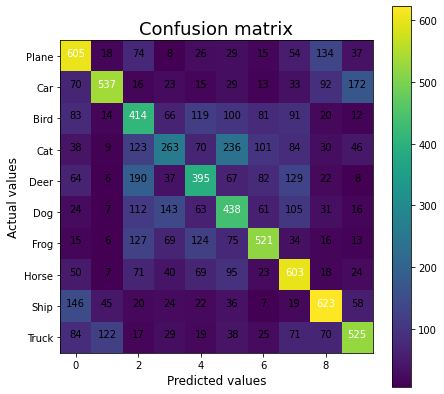

In [74]:
#plotting
plt.figure(figsize=(7,7))
plt.imshow(conf_matrix)
plt.title("Confusion matrix", fontsize=18)
plt.ylabel('Actual values', fontsize=12)
plt.xlabel('Predicted values', fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.colorbar()

import itertools
for i,j in itertools.product(range(nr_rows), range(nr_cols)):
  plt.text(j, i, conf_matrix[i,j], horizontalalignment='center',
           color='white' if conf_matrix[i,j] > conf_matrix.max()/2 else 'black')
plt.show()

In [65]:
#True positive values
np.diag(conf_matrix)

array([605, 537, 414, 263, 395, 438, 521, 603, 623, 525])

In [67]:
#recall value
recall = np.diag(conf_matrix) /np.sum(conf_matrix, axis=1)
recall

array([0.605, 0.537, 0.414, 0.263, 0.395, 0.438, 0.521, 0.603, 0.623,
       0.525])

In [68]:
#precision value
precision = np.diag(conf_matrix) /np.sum(conf_matrix, axis=0)
precision

array([0.513, 0.696, 0.356, 0.375, 0.428, 0.383, 0.561, 0.493, 0.59 ,
       0.576])

In [70]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.3f}')

Model 2 recall score is 0.492


In [72]:
avg_precision = np.mean(precision)
print(f'Model 2 precision model is {avg_precision:.2f}')

Model 2 precision model is 0.50
